 ----------------------
# Marketing Campaign Analysis


-----------------
## Context
-----------------

Marketing Analytics broadly refers to the practice of using analytical methods and techniques to understand the effectiveness of various marketing activities and deploy data-driven decisions to optimize for ROI on conversion rates. It typically involves analyzing various metrics around customer engagement with various marketing activities including but not limited to, ATL (above the line) marketing activities, BTL (below the line) campaigns, targeting personalized offers. Typically the variables of interest are customer profile, campaign conversion rates, and costs associated with various marketing channels. These can generate valuable insights that can help an organization form better marketing strategies, optimize/innovate on delivery, and achieve overall growth.

---
## Data Dictionary
---

- ID : Unique ID of each customer
- Year_Birth : Age of the customer
- Education : Customer's level of education
- Marital_Status : Customer's marital status
- Kidhome : Number of small children in customer's household
- Teenhome : Number of teenagers in customer's household
- Income : Customer's yearly household income
- Recency : Number of days since the last purchase
- MntFishProducts : The amount spent on fish products in the last 2 years
- MntMeatProducts : The amount spent on meat products in the last 2 years
- MntFruits : The amount spent on fruits products in the last 2 years
- MntSweetProducts : Amount spent on sweet products in the last 2 years
- MntWines : The amount spent on wine products in the last 2 years
- MntGoldProds : The amount spent on gold products in the last 2 years
- NumDealsPurchases : Number of purchases made with discount
- NumCatalogPurchases : Number of purchases made using catalog (buying goods to be shipped through the mail)
- NumStorePurchases : Number of purchases made directly in stores
- NumWebPurchases : Number of purchases made through the company's website
- NumWebVisitsMonth : Number of visits to company's website in the last month
- AcceptedCmp1 : 1 if customer accepted the offer in the first campaign, 0 otherwise 
- AcceptedCmp2 : 1 if customer accepted the offer in the second campaign, 0 otherwise
- AcceptedCmp3 : 1 if customer accepted the offer in the third campaign, 0 otherwise
- AcceptedCmp4 : 1 if customer accepted the offer in the fourth campaign, 0 otherwise
- AcceptedCmp5 : 1 if customer accepted the offer in the fifth campaign, 0 otherwise
- AcceptedCmp6 : 1 if customer accepted the offer in the last campaign, 0 otherwise 
- Complain : 1 If the customer complained in the last 2 years, 0 otherwise
- Country: Country customer belongs to

## Importing libraries and overview of the dataset

In [1]:
# Library to supress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading the dataset

In [4]:
# loading the dataset

df = pd.read_csv('~/Desktop/Kaggle Projects/Marketing EDA/marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


# Checking info of the dataset

In [5]:
# Checking the info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

**Observations**

- We can see that 'Income' has less than 2240 non-null values, meaning that this column has missing values. Will explore this further

- We can also see that the income column is not of type 'float' and has dollar signs and commas which we will need to deal with to make our analysis possible

In [7]:
# Changing the column name from ' Income' to 'Income' to get rid of the whitespace
df.rename(columns={' Income ':'Income'}, inplace = True)
# Changing datatype of Income from object to float
df["Income"]=df["Income"].str.replace("$","")
df["Income"]=df["Income"].str.replace(",","")
df["Income"]=df["Income"].astype(float)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Checking the percentage of missing values from the income column. 

In [9]:
# % Null values in the Income column

(df.isnull().sum()/df.shape[0]*100)['Income']

1.0714285714285714

**Observations:**
* Income has ~1.07 missing values

### Let's create a list for numerical columns in the dataset and check the summary statistics

In [10]:
# Num_cols contain numerical variables

num_cols=['Year_Birth','Income','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Kidhome',
       'Teenhome']

In [12]:
# Printing descriptive statistics of numerical columns

df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0
NumDealsPurchases,2240.0,2.325000,1.932238,0.0,1.00,2.0,3.00,15.0


**Observations:** 

Potential outliers or randomly/incorrectly entered values in severeal columns. 



*   The minimum Year_Birth of 1893 doesn't seem to be correctly entered. 
*   The minimum Income value seems to be far too low according to the mean and median, and the maximum value of 666,666 may have just been randomly entered. 
*   MntWines mean seems to suggest that customers tend to spend fairly heavily on wine, though there might be some outliers (such as the max value of 1493) of potential alcoholics or wine enthusiasts that are skewing the data. Nevertheless, the median(which is more resistant to outliers) suggests that this set of customers does indeed tend to spend more on wine compared to other products. 
*   MntMeatProducts, MntFishProducts,MntSweetProducts, MntGoldProds, also all might potentially have outliers because their max values are all well beyond the mean and median.

Other notes: 

*   Data suggests that the business might be more popular with folks without kids/teens due to the low median and mean values
*   Catalog purchases seem relatively low compared to other methods. 
*   A large portion of customers seem to be middle-aged, in their fiftees. 



### Let's create a list for categorical colums in the dataset and check the count of each category

In [16]:
#cat_cols contains categorical variables
cat_cols=['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2','Complain', 'Country']

In [17]:
# Printing the count of each unique value in each column

for column in cat_cols:
    print(df[column].value_counts(normalize=True))
    print("-" * 40)

Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64
----------------------------------------
Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
YOLO        0.000893
Absurd      0.000893
Name: Marital_Status, dtype: float64
----------------------------------------
0    0.927232
1    0.072768
Name: AcceptedCmp3, dtype: float64
----------------------------------------
0    0.925446
1    0.074554
Name: AcceptedCmp4, dtype: float64
----------------------------------------
0    0.927232
1    0.072768
Name: AcceptedCmp5, dtype: float64
----------------------------------------
0    0.935714
1    0.064286
Name: AcceptedCmp1, dtype: float64
----------------------------------------
0    0.986607
1    0.013393
Name: AcceptedCmp2, dtype: float64
----------------------------------------
0    0.990625
1    0.009375
Name: Complain, dt

**Observations** 

- In education, 2n cycle and Master means the same thing. We can combine these two categories.
- There are many categories in marital status. We can combine the category 'Alone' with 'Single'.
- It is not clear from the data that what do the terms 'Absurd', and 'YOLO' actually mean. We can combine these categories to make a new category - 'Others'.
- There are only 21 customers who complained in the last two years.
- The majority of the customers belong to Spain and least to Mexico.
- The most common educational status is Graduation
- The most common marital status is Married

## Data Preprocessing and exploratory Data Analysis

In this section, we will first prepare our dataset for analysis.
- Fixing the categories
- Creating new columns as the total amount spent, total purchase made, total kids at home, and total accepted campaigns
- Dealing with missing values and outliers
- Extract key insights from the data

**Replacing the "2n Cycle" category with "Master" in Education and "YOLO", "Alone", and "Absurd" categories with "Single" in Marital_Status**

In [18]:
# Replacing 2n Cycle with Master

df["Education"].replace("2n Cycle", "Master", inplace=True)

In [19]:
# Replacing YOLO, Alone, Absurd with Single

df["Marital_Status"].replace(["Alone",], "Single", inplace=True)

In [20]:
df['Marital_Status'].replace(["Absurd", "YOLO"], "Others", inplace=True)

We have fixed the categories in the Marital_Status, now let's see the distribution count in different categories for marital status. 

In [21]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      483
Divorced    232
Widow        77
Others        4
Name: Marital_Status, dtype: int64

**Observation**:

- The majority of customer belong to married category and the other category have only 4 observations.

### Creating new features from the existing features

In [22]:
# creating new features to get overall picture of a customer, how much he/she has spend, 
#how many children he/she has, total campaigns accepted, etc.


# total spending by a customer
spending_col = [col for col in df.columns if 'Mnt' in col]
df['Total_Spending'] = df[spending_col].sum(axis = 1) 

#total purchases made by a customer
platform_col = [col for col in df.columns if 'Purchases' in col]
df['Total_Purchase'] = df[platform_col].sum(axis = 1) 

#total no. of childern
df['NumberofChildren'] = df['Kidhome'] + df['Teenhome']  

# Total no. of campaign accepted by a customer
campaigns_cols = [col for col in df.columns if 'Cmp' in col]
df['TotalCampaignsAcc'] = df[campaigns_cols].sum(axis=1)

### Let's check outliers for new variables - Total_Spending, Total_Purchase. Also, let's analyze the Year_Birth column as we observed above that it hada minimumvalue of 1893

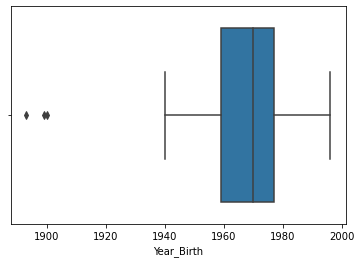

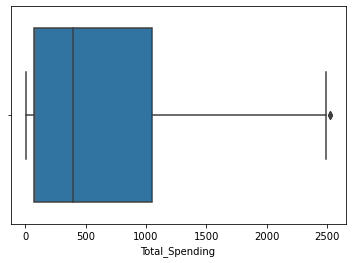

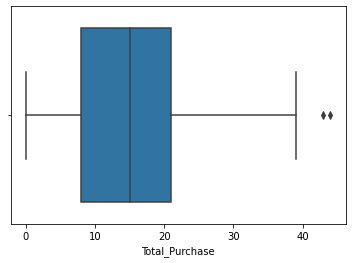

In [24]:
# Plotting boxplot for Year_Birth, Total_Spending, Total_Purchase

cols = ['Year_Birth','Total_Spending','Total_Purchase']
for column in cols:
    sns.boxplot(x=df[column])
    plt.show()

**Observations:**
- The birth year is reported as <=1900 for some users, while the current year is 2021. it's very unlikely that the person is alive. it may be a reporting error.
- There are some outliers in total spending and total purchase. 
- The observations marked as outliers are very closed to the upper whisker and some extreme points can be expected for variables like total spending. We can leave these outliers untreated. 

Let's check the number of observations for which year birth is less than 1900. 

In [25]:
df[df['Year_Birth']<1900]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Spending,Total_Purchase,NumberofChildren,TotalCampaignsAcc
513,11004,1893,Master,Single,60182.0,0,1,5/17/14,23,8,...,0,0,0,0,0,SA,22,4,1,0
827,1150,1899,PhD,Together,83532.0,0,0,9/26/13,36,755,...,1,0,0,0,0,SP,1853,15,0,1


**Observation:**

* There are only 2 observations for which birth year is less than 1900. We can drop these observations

In [26]:
#keeping data for customers having birth year > 1900

df = df[df['Year_Birth']>1900]

## Checking the outliers and imputing the missing values for the Income variable

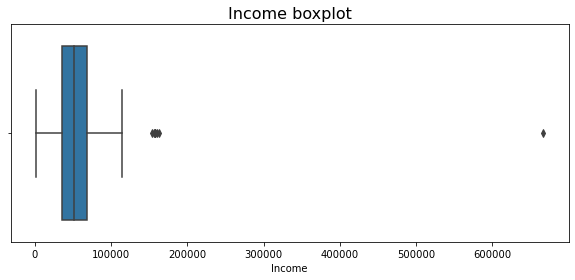

In [27]:
#plotting Boxplot for income

plt.figure(figsize=(10,4))
sns.boxplot(df['Income'])
plt.title('Income boxplot', size=16)
plt.show()

**Observations:**

- We can see from the boxplot that there are some outliers in the income variable.
- Let's find the value at upper whisker to check how many observations are marked as outliers.

In [29]:
#Calculating the upper whisker for the Income variable

Q1 = df.quantile(q=0.25) #First quartile
Q3 = df.quantile(q=0.75) #Third quartile
IQR = Q3 - Q1            #Inter Quartile Range

upper_whisker = (Q3 + 1.5*IQR)['Income']   #Upper Whisker
print(upper_whisker)

118348.5


In [30]:
#Checking the observations marked as outliers
df[df.Income>upper_whisker]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Spending,Total_Purchase,NumberofChildren,TotalCampaignsAcc
325,4931,1977,Graduation,Together,157146.0,0,0,4/29/13,13,1,...,0,0,0,0,0,SA,1730,28,0,0
497,1501,1982,PhD,Married,160803.0,0,0,8/4/12,21,55,...,0,0,0,0,0,US,1717,44,0,0
527,9432,1977,Graduation,Together,666666.0,1,0,6/2/13,23,9,...,0,0,0,0,0,SA,62,11,1,0
731,1503,1976,PhD,Together,162397.0,1,1,6/3/13,31,85,...,0,0,0,0,0,SP,107,1,2,0
853,5336,1971,Master,Together,157733.0,1,0,6/4/13,37,39,...,0,0,0,0,0,SP,59,2,1,0
1826,5555,1975,Graduation,Divorced,153924.0,0,0,2/7/14,81,1,...,0,0,0,0,0,SP,6,0,0,0
1925,11181,1949,PhD,Married,156924.0,0,0,8/29/13,85,2,...,0,0,0,0,0,CA,8,0,0,0
2204,8475,1973,PhD,Married,157243.0,0,1,3/1/14,98,20,...,0,0,0,0,0,IND,1608,37,1,0


**Observations**:

- We have only 8 observations with an income greater than the upper whisker. 
- Only 3 observations (ID- 4931, 1501, 8475) out of 8 outliers have purchased more than 11 times in the last 2 years.
- Other 5 observations have very less amount of total spending.

**Let's compare the summary statistics for these observations with observations on the other side of the upper whisker.**

In [32]:
#Checking the summary statistics for observations marked as outliers
df[df.Income>upper_whisker].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8.0,5989.250,3525.251308,1501.0,4074.00,5445.5,8714.25,11181.0
Year_Birth,8.0,1972.500,10.028531,1949.0,1972.50,1975.5,1977.00,1982.0
Income,8.0,221604.500,179850.404431,153924.0,157090.50,157488.0,161201.50,666666.0
Kidhome,8.0,0.375,0.517549,0.0,0.00,0.0,1.00,1.0
Teenhome,8.0,0.250,0.462910,0.0,0.00,0.0,0.25,1.0
Recency,8.0,48.625,33.687376,13.0,22.50,34.0,82.00,98.0
MntWines,8.0,26.500,30.798887,1.0,1.75,14.5,43.00,85.0
MntFruits,8.0,4.500,6.524678,0.0,1.00,1.0,5.00,16.0
MntMeatProducts,8.0,621.875,846.511402,1.0,7.25,17.0,1592.00,1725.0
MntFishProducts,8.0,4.250,5.650537,1.0,1.00,2.0,3.50,17.0


In [33]:
#Checking the summary statistics for observations not marked as outliers
df[df.Income<upper_whisker].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2205.0,5585.439456,3247.546423,0.0,2815.0,5455.0,8418.0,11191.0
Year_Birth,2205.0,1968.904308,11.705801,1940.0,1959.0,1970.0,1977.0,1996.0
Income,2205.0,51622.094785,20713.063826,1730.0,35196.0,51287.0,68281.0,113734.0
Kidhome,2205.0,0.442177,0.537132,0.0,0.0,0.0,1.0,2.0
Teenhome,2205.0,0.506576,0.544380,0.0,0.0,0.0,1.0,2.0
Recency,2205.0,49.009070,28.932111,0.0,24.0,49.0,74.0,99.0
MntWines,2205.0,306.164626,337.493839,0.0,24.0,178.0,507.0,1493.0
MntFruits,2205.0,26.403175,39.784484,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2205.0,165.312018,217.784507,0.0,16.0,68.0,232.0,1725.0
MntFishProducts,2205.0,37.756463,54.824635,0.0,3.0,12.0,50.0,259.0


**Observations**:

- None of the outliers have accepted any of the campaigns or have submitted any complaints in the last 2 years.
- We can see that customers who are outliers have lower mean expenditure per customer for all the products except meat products.
- The outliers have a higher number of catalog purchases on average and very low number of web purchases.
- We can drop the 5 observations at indices [527, 731, 853, 1826, 1925] as they would not add value to our analysis.

In [34]:
#Dropping 5 observations at indices 527, 731, 853, 1826, 1925
df.drop(index=[527, 731, 853, 1826, 1925], inplace=True)

### Checking the distribution for Income

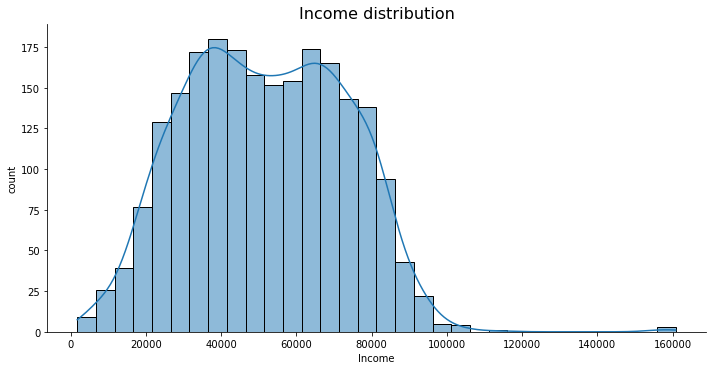

In [35]:
#plotting displot for income

sns.displot(df['Income'], kde = True, height = 5, aspect = 2)
plt.title('Income distribution', size = 16)
plt.ylabel('count');

**Observations:**

- After treating outliers, the distribution for the income variable is close to normal distribution with very few extreme observations to the right.
- We will replace the missing values for the income variable with the median, and not mean, as the variable is slightly skewed to the right

In [36]:
#filling null values with median

df['Income'].fillna(df.Income.median(), inplace=True)

--- 
## Analyzing all the campaigns

**Let's find out the acceptance rate for each campaign**

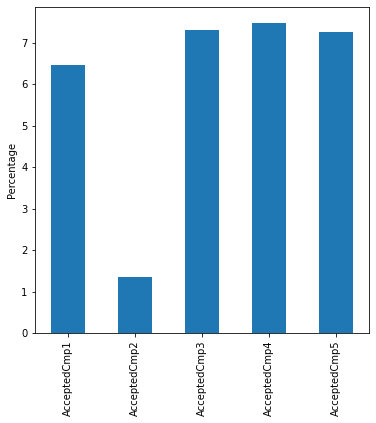

In [38]:
# PLotting the % acceptance for every campaign

Camp_cols=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

success_campaign=(df[Camp_cols].sum()/df.shape[0])*100

# plot
success_campaign.plot(kind='bar', figsize=(6,6))
plt.ylabel("Percentage")
plt.show()

### Let's analyze what kind of customers are accepting the campaigns

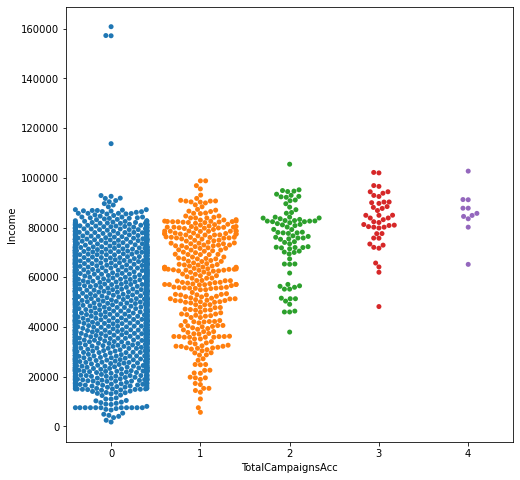

In [39]:
plt.figure(figsize=(8,8))
sns.swarmplot(x='TotalCampaignsAcc', y='Income', data=df)
plt.show()

**Observations:**
- Higher the income higher the number of campaigns accepted.

In [40]:
# Let's see the mean income of the customers
df.Income.mean()

51762.59811827957

**The mean income of customers is close to 52k. Let's divide the income into 2 segments of income. One above 52k and the other below 52k and see the acceptance rate in each segment.** 

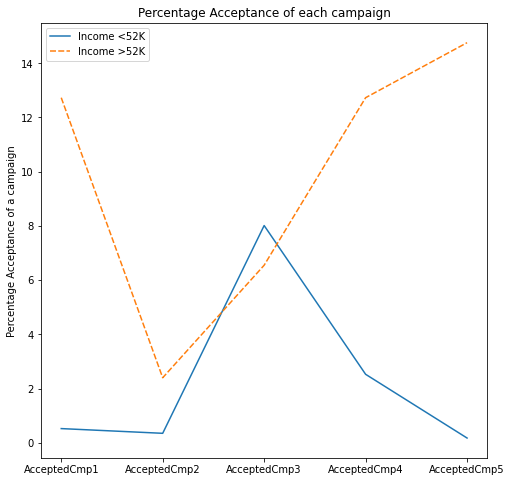

In [41]:
# making dataframes of customers having income <52k and >52K
df1=df[df.Income<52000]
df2=df[df.Income>52000]

Camp_cols=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

#Calculating success rate of each campaign for both segments 
success_campaign1=pd.DataFrame((df1[Camp_cols].sum()/df1.shape[0])*100, columns=['Income <52K'])

success_campaign2=pd.DataFrame((df2[Camp_cols].sum()/df2.shape[0])*100, columns=['Income >52K'])

new_df=pd.concat([success_campaign1, success_campaign2], axis=1)

# plot
plt.figure(figsize=(8,8))
sns.lineplot(data=new_df)
plt.title("Percentage Acceptance of each campaign")
plt.ylabel("Percentage Acceptance of a campaign")
plt.show()

**Observations:**

*   The upper income bracket seems to accept campaigns at a much higher rate than the lower income bracket. 

* The only campaign that saw effectiveness on the lower income bracket is campaign 3. 

* Campaign 5 shows the largest discreptancy between the two income groups, with a high acceptance rate for >52k and very low for <52k

* Campaign 2 appears to be largely ineffective for both income groups

**Let's check if the product preference for those who accepted the campaigns is different from those who didn't by using amount spent and number of purchases** 

Let's define a function which will take the column name for the product as input and generate the plot for every campaign and average amount spent on a product

In [44]:
def amount_per_campaign(columns_name):
    p1=pd.DataFrame(df.groupby(['AcceptedCmp1']).mean()[columns_name]).T
    p2=pd.DataFrame(df.groupby(['AcceptedCmp2']).mean()[columns_name]).T
    p3=pd.DataFrame(df.groupby(['AcceptedCmp3']).mean()[columns_name]).T
    p4=pd.DataFrame(df.groupby(['AcceptedCmp4']).mean()[columns_name]).T
    p5=pd.DataFrame(df.groupby(['AcceptedCmp5']).mean()[columns_name]).T
    pd.concat([p1,p2,p3,p4,p5],axis=0).set_index([Camp_cols]).plot(kind='line', figsize=(8,8))
    plt.ylabel('Average amount spend on' + ' ' + columns_name)
    plt.show()

**We will now use this function to generate the plots for different purchasing products**

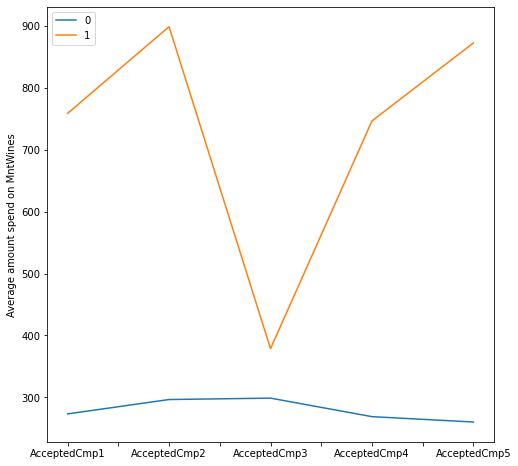

In [45]:
# Wines 
amount_per_campaign('MntWines')

**Observations:**

* For the customers accepting campaign 2 and 5, the average spending is quite high whereas it is very low for those accepting campaign 3

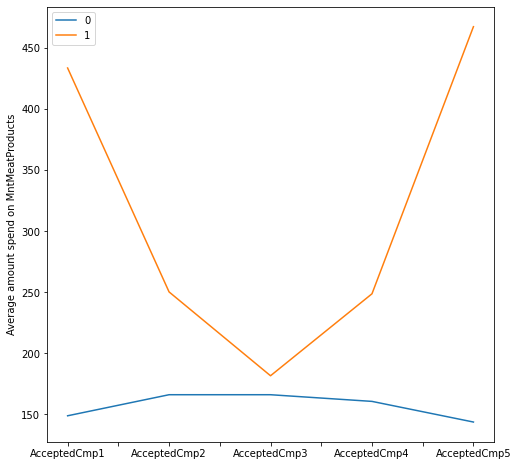

In [46]:
# Meat Products

amount_per_campaign('MntMeatProducts')

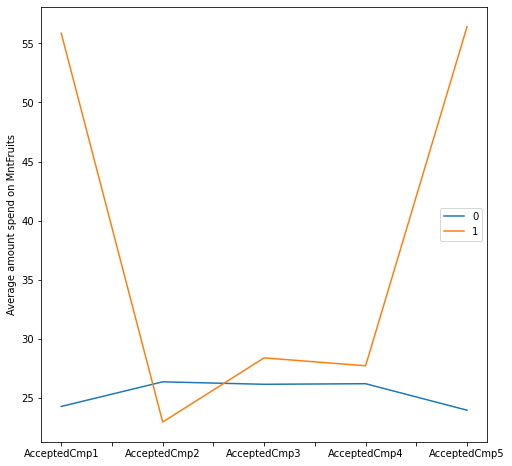

In [47]:
# Fruit products

amount_per_campaign('MntFruits')

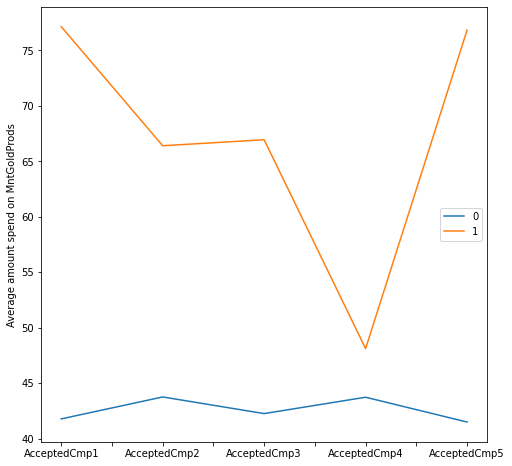

In [48]:
# gold products

amount_per_campaign('MntGoldProds')

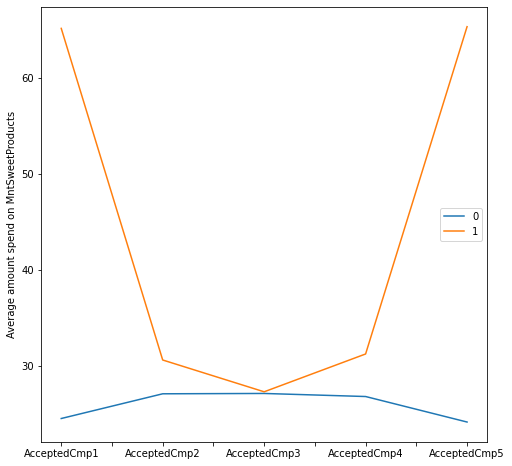

In [49]:
# Sweet products

amount_per_campaign('MntSweetProducts')

**Observations**

* We see a very similar pattern between the graphs for sweet products and meat products. Those who accept campaign 1 and 5 seem to spend a lot on these products whereas those who accept campaign 3 seem to spend a lot less on them. 

* Campaign 5 sees higher average spending across all categories for those who accepted it. 

### We have analyzed the relationship between campaigns and different products. Now, let's see the relationship of campaigns with different purchasing channels.


Let's define a function that will take the column name of the channel name as input and generate a plot for every campaign and average purchase made through that channel if the channel is accepted

In [51]:
def Purchases_per_campaign(columns_name):
    dp1=pd.DataFrame(df.groupby(['AcceptedCmp1']).mean()[columns_name]).T
    dp2=pd.DataFrame(df.groupby(['AcceptedCmp2']).mean()[columns_name]).T
    dp3=pd.DataFrame(df.groupby(['AcceptedCmp3']).mean()[columns_name]).T
    dp4=pd.DataFrame(df.groupby(['AcceptedCmp4']).mean()[columns_name]).T
    dp5=pd.DataFrame(df.groupby(['AcceptedCmp5']).mean()[columns_name]).T
    pd.concat([dp1,dp2,dp3,dp4,dp5],axis=0).set_index([Camp_cols]).plot(kind='line', figsize=(8,8))
    plt.ylabel('Average' + ' ' + columns_name)
    plt.show()

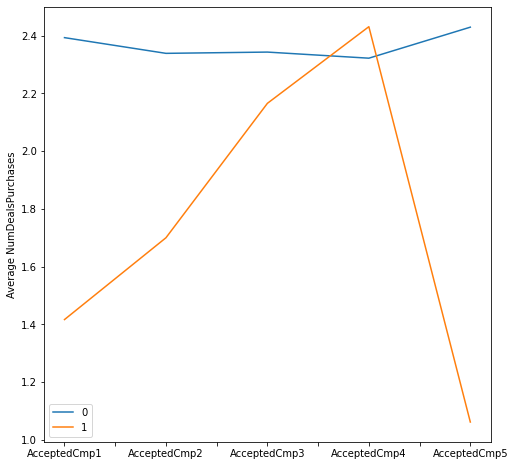

In [52]:
# For deal purchases
Purchases_per_campaign('NumDealsPurchases')

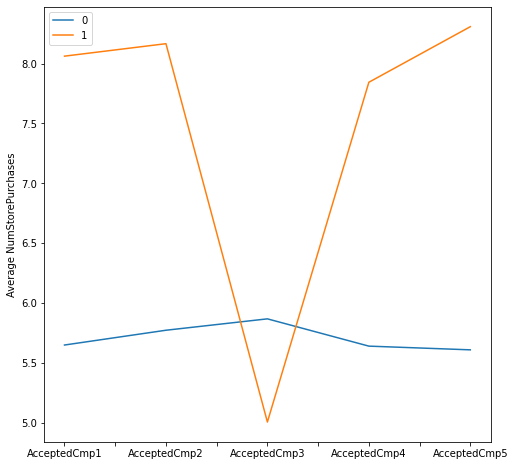

In [53]:
# store purchase

Purchases_per_campaign('NumStorePurchases')

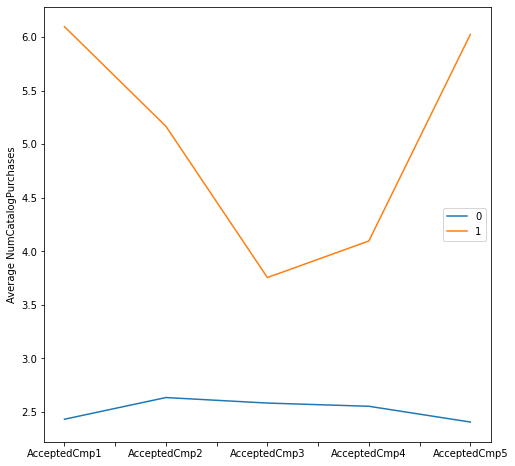

In [54]:
#Catalog purchase

Purchases_per_campaign('NumCatalogPurchases')

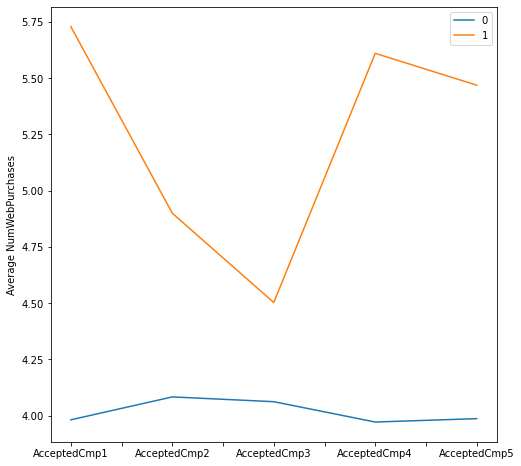

In [55]:
Purchases_per_campaign('NumWebPurchases')

**Observations:**

* Outside of those who accepted campaign 4, those who didn't accept the campaigns generally have more deal purchases

* Outside of those who accepted campaign 3, those who didn't accept the campaigns generally do less in store purchases

* Catalog purchases are more popular with those accepting the campaigns, especially 1 and 5.

* Web purchases are also more popular with those who accepted the campaigns,especially 1 and 4

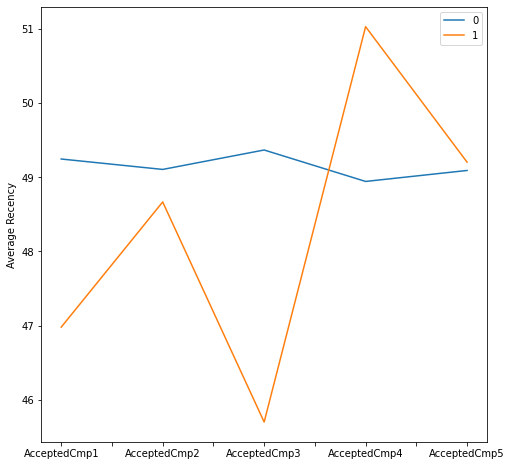

In [56]:
#Recency

Purchases_per_campaign('Recency')

**Observations:**
- Average recency of the customers who accepted campaign 3 is quite low which implies that campaign 2 was accepted by the customers who recently purchased an item. 

### We have analyzed the relationship between campaigns and numerical variables. Let's see the relationship of campaigns with different categorical variables

We will check the percentage acceptance of each campaign with respect to each category in the categorical variable. The percentage acceptance is calculated as number of customers who have accepted the campaign to the total number of customers.

In [57]:
def Cat_Campaign_Relation(df, column_name):
    e1=(df.groupby([column_name]).sum()['AcceptedCmp1']/df.groupby([column_name]).count()['AcceptedCmp1'])
    e2=(df.groupby([column_name]).sum()['AcceptedCmp2']/df.groupby([column_name]).count()['AcceptedCmp2'])
    e3=(df.groupby([column_name]).sum()['AcceptedCmp3']/df.groupby([column_name]).count()['AcceptedCmp3'])
    e4=(df.groupby([column_name]).sum()['AcceptedCmp4']/df.groupby([column_name]).count()['AcceptedCmp4'])
    e5=(df.groupby([column_name]).sum()['AcceptedCmp5']/df.groupby([column_name]).count()['AcceptedCmp5'])
    df_new=pd.concat([e1,e2,e3,e4,e5],axis=1).T
    plt.figure(figsize=(8,8))
    sns.lineplot(data=df_new, markers=True, linewidth=2)
    plt.ylabel('Percentage Acceptance')
    plt.show()

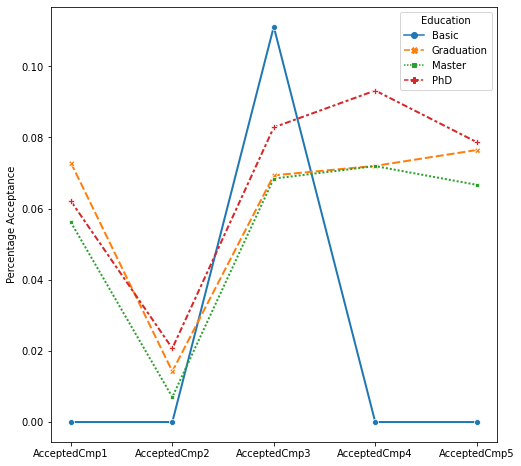

In [58]:
#Education

Cat_Campaign_Relation(df,'Education')

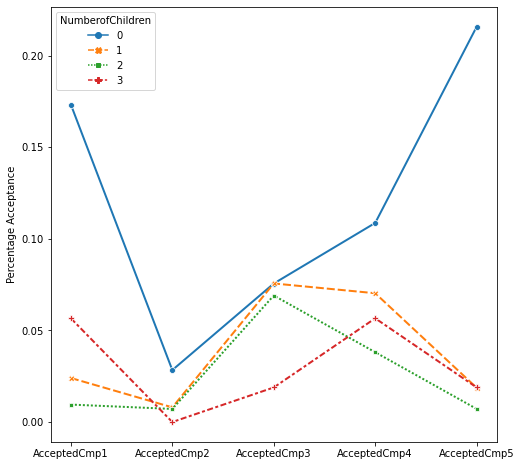

In [59]:
Cat_Campaign_Relation(df, 'NumberofChildren')

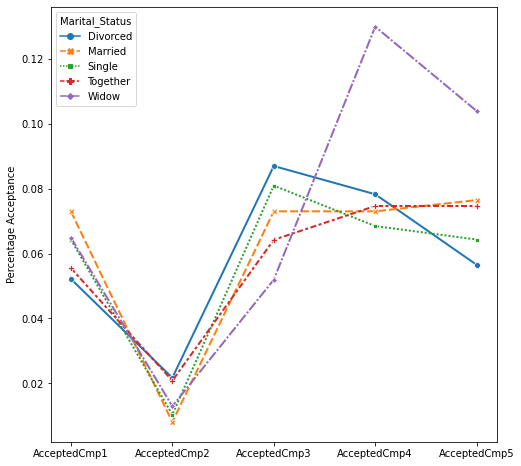

In [60]:
#Let's filter the observations with 'Others' category as they are only 4 such observations
df_rest=df[df.Marital_Status!='Others']

#call the function Cat_Campaign_Relation for Marital_Status with dataframe df_rest

Cat_Campaign_Relation(df_rest, 'Marital_Status')

<AxesSubplot:ylabel='Country'>

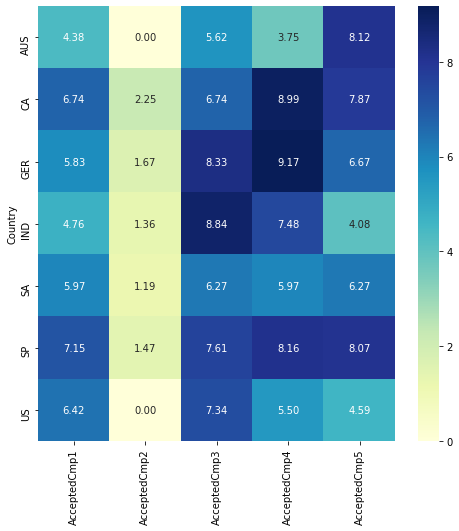

In [61]:
#Let's filter the observations for 'ME' country as they are only 3 such observations
df_not_mexico=df[df.Country!='ME']

#Plot
plt.figure(figsize=(8,8))
sns.heatmap((df_not_mexico.groupby('Country').sum()[Camp_cols]/df_not_mexico.groupby('Country').count()[Camp_cols])*100, annot=True, fmt='0.2f', cmap="YlGnBu")

**Observations:**

* **Education:** Campaign 3 is very popular among those with basic education, whereas campaign 4 is popular among those with higher education levels especially those with a PhD

* **Chilren:** We see that the acceptance rate for campaign 5 is very high for those with no children whereas it is one of the lowest for those who do have children.

* **Marital Status:** Campaign 4 sees the highest acceptance rate with those who are widowed, whereas campaign 3 sees higher acceptance rates for those who are divorced,married, single, and together. 

* **Country:** Campaign 4 has proven very effective in Germany and Canada whereas the acceptance is much lower in Australia. Meanwhile, Australia has the highest acceptance for campaign 5 and India has the highest acceptance with campaign 3.

### Now let's check the product preference by customers




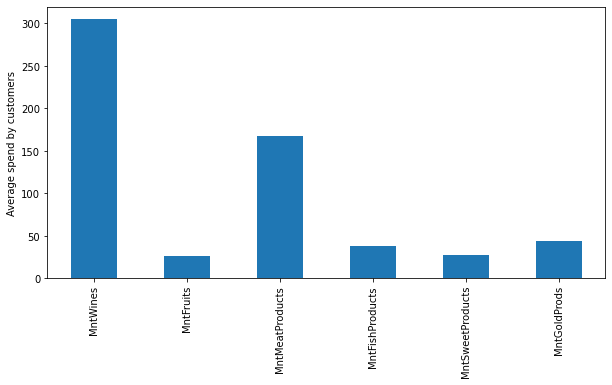

In [62]:
#creating a list which contains name of all products

mnt_cols = [col for col in df.columns if 'Mnt' in col]

spending = df[mnt_cols].mean(axis=0)
spending.plot(kind='bar',figsize=(10,5))
plt.ylabel('Average spend by customers')
plt.show()


**Observations**:

- The mean amount spent by customers is highest for wines followed by meat products.

Let's check if the product preferences are similar for different types of customers. We will calculate the percentage amount spent by customers on a product for each category with respect to the total spending by customers belonging to that category.

In [63]:
def amount_per_category(df, column_name):
    df_new1=((df.groupby([column_name]).sum()[mnt_cols].T)/df.groupby([column_name]).sum()['Total_Spending'])
    plt.figure(figsize=(10,8))
    sns.heatmap(df_new1.T, annot=True, cmap="YlGnBu")
    plt.show()

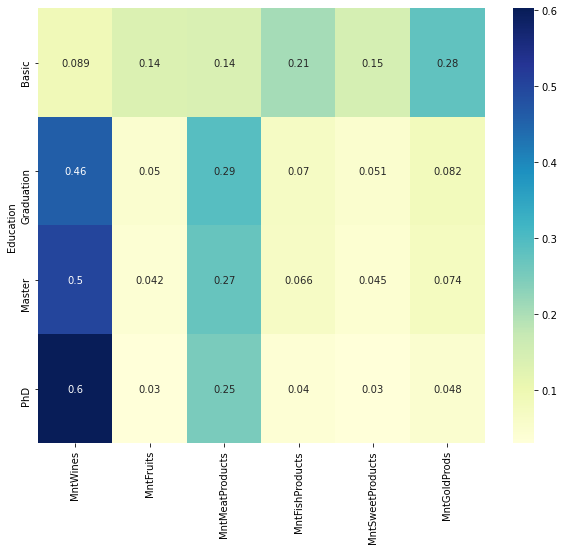

In [64]:
# plot showing the percentage of total spending of different products by a group of customers having the same education level

amount_per_category(df, 'Education')

**Observations:**
- Customers with PhD spend ~60% of their total spending on wines.
- Customers with Graduation and Master's spend ~45-50% of their total spending on wines.
- Customers with Graduation and Master's spend ~27-29% of their total spending on meat.
- Customers with PhD spend ~25% of their total spending on meat.
- Customers having education level Master or PhD spend ~80% on meat and wines.
- Customers with basic education spend more on Fruits, Fish, Sweet, and Gold products.

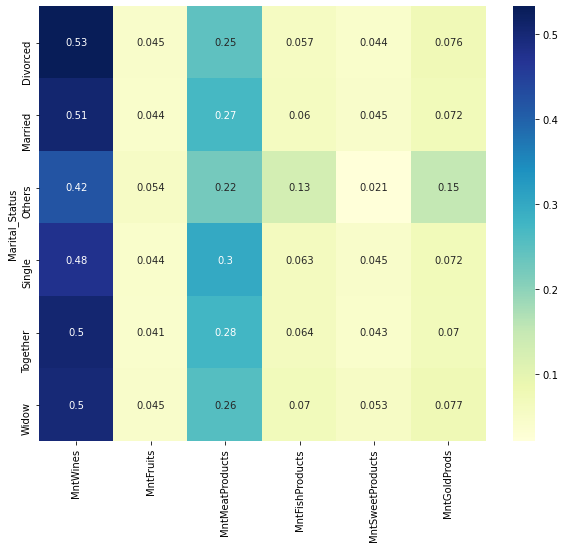

In [65]:
#Marital Status

amount_per_category(df, 'Marital_Status')

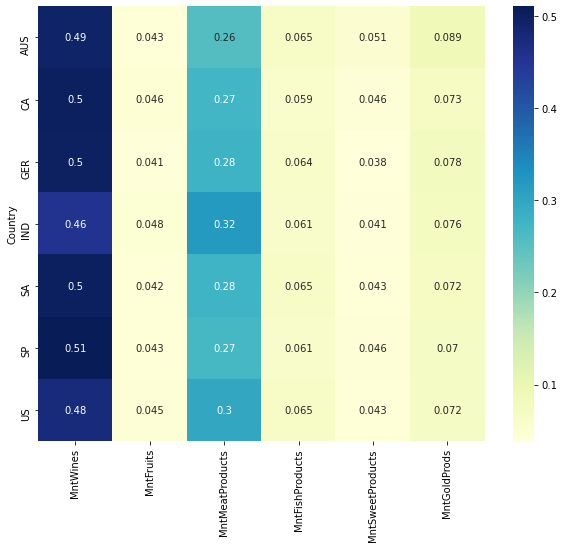

In [67]:
#Country

amount_per_category(df_not_mexico, 'Country')

**Observations:**

* The country of origin does not seem to have an effect on spending patterns on different products, as each country has approximately 80% of spending used on wine products and meat products. 

* The same trend applies for marital status (apart from others, which is around 64% of spending spent on wine and meat products) 

* Across all 3 heatmaps, the heaviest spenders on wine are those with PhDs (60%) and those who are divorced (53%)

### Let's check the different channel performances

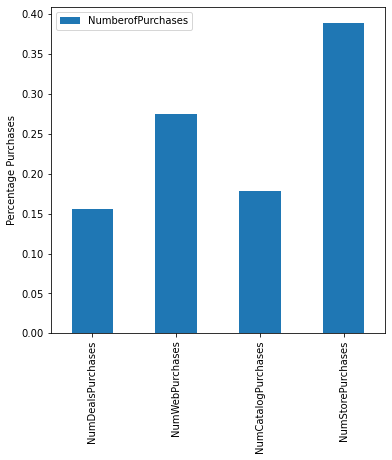

In [68]:
# list of cols for channels

channel_cols = [col for col in df.columns if 'Purchases' in col] 

#making dataframe of columns having purchase and taking sum of them.
channels = pd.DataFrame(df[channel_cols].sum()/df.Total_Purchase.sum(), columns=['NumberofPurchases'])

# plot
channels.plot(kind='bar', figsize=(6,6))
plt.ylabel("Percentage Purchases")
plt.show()

**Observations**:

- We can see that the most purchases are from the stores followed by web purchases.
- Number of deal purchases and catalog purchases are low.

### Now let's check how number of purchases via different channels varies for different income bins

In [69]:
#Binning the income column
df['income_cat']=pd.qcut(df.Income, q=[0, 0.25, 0.50, 0.75, 1], labels=['low', 'medium', 'high', 'very_high'])

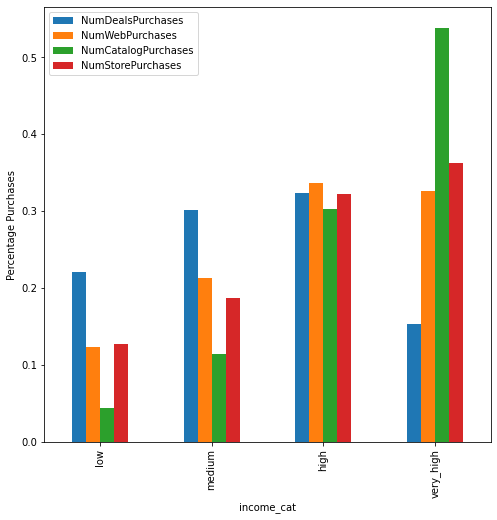

In [70]:
group=df.groupby('income_cat').sum()[channel_cols]
(group/group.sum()).plot(kind='bar', figsize=(8,8))
plt.ylabel("Percentage Purchases")
plt.show()

**Observations:**

* The percentage of deal purchases is the highest for the low income bracket and progressively increases but then suddenly drops for the very high income bracket, where it is the lowest percentage category. 

* The percentage of catalog purchases is very low in the low income bracket, but increases as the income increases. It reaches over 50% of purchases in the very high income bracket

* the percentage Store and web purchases follow the same trend across all income brackets, steadily increasing as the level of income increases, and they are the highest percentage categories in the high income bracket.

### We can also visualize the correlation by purchases from different channels and income of the customer.

In [71]:
corr=df[['Income', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases' ]].corr()

corr

,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Income,1.000000,-0.098825,0.474117,0.718287,0.658615
NumDealsPurchases,-0.098825,1.000000,0.231694,-0.010497,0.065145
NumWebPurchases,0.474117,0.231694,1.000000,0.376727,0.500237
NumCatalogPurchases,0.718287,-0.010497,0.376727,1.000000,0.517757
NumStorePurchases,0.658615,0.065145,0.500237,0.517757,1.000000


<AxesSubplot:>

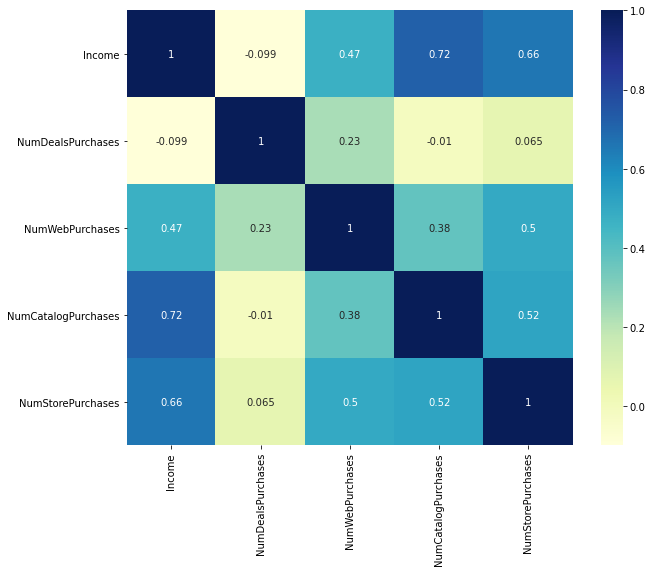

In [72]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True, cmap="YlGnBu")

**Observations:**

* We can see a relatively high correlation between income and catalog spending (0.72) as well as between income and store purchases (0.66). 

* We also see almost no correlation between catalog purchases and deal purchases (-0.01), and very little correlation between store purchases and deal purchases(0.065). 

* Web purchases and income seem to be moderately correlated (0.47) 

As we know from our analysis we have done so far that customers with income, number of children, and amount spending on wines are the important factors.  Let's try to come up with new customer profile on the basis of these 3 attributes and check what would be the acceptance rate for that customer profile.

In [73]:
df3=df[df.Income>52000]
df4=df3[df3.MntWines>df3.MntWines.mean()]
new_profile=df4[df4.NumberofChildren==0]

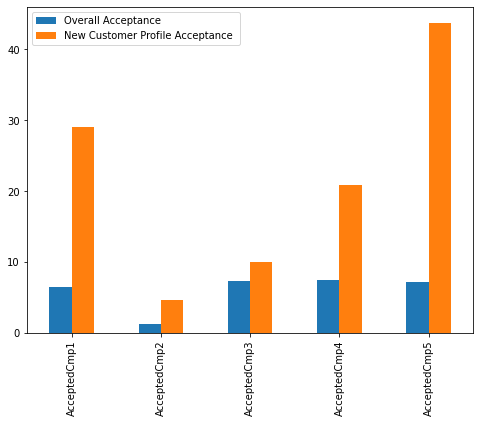

In [74]:
#Calculating success rate of each campaign for both segments 
success_campaign3=pd.DataFrame(success_campaign, columns=['Overall Acceptance'])

success_campaign4=pd.DataFrame((new_profile[Camp_cols].sum()/new_profile.shape[0])*100, columns=['New Customer Profile Acceptance '])

# plot
pd.concat([success_campaign3, success_campaign4], axis=1).plot(kind='bar', figsize=(8,6))
plt.title("")
plt.ylabel("")
plt.show()

**Observations:**
- Orange bars in the plot indicate that the acceptance rate would have been high for new customer profile i.e. income greater than the mean income, no kid at home, amount spent of wines is greater than the mean amount spent on wines.